In [6]:
import os
import numpy as np

from utils import preprocess


INVIVO_DATA_PATH = '/home/matt/repos/Research/Neuron_Burst_Analysis/data/invivo/LFP_data.npz'
INVIVO_RAW_PATH = '/home/matt/repos/Research/Neuron_Burst_Analysis/data/invivo/LFP_BLA_gamma.mat'

In [7]:
from scipy import signal, io
from config import params

oscBand = np.array([0.08,0.14])
z, a = signal.butter(4,oscBand,btype='bandpass')

mat = io.loadmat(INVIVO_RAW_PATH)['LFP_seg']
for arr in mat:
    # print(arr[0].shape)
    if arr[0].shape[0] < (params.PREVIOUS_TIME + params.LOOK_AHEAD):
        # print(arr[0].shape[0])
        continue
    # for i in range(arr[0].shape[0] - (params.PREVIOUS_TIME + params.LOOK_AHEAD)):
    i = 0
    t = i+params.PREVIOUS_TIME
    k = params.LOOK_AHEAD
    # print(arr[0].shape)

    x = np.concatenate((arr[0][i:t,:], np.zeros((100, 1))), axis=0)
    y0 = signal.lfilter(z, a, x, axis=0)
    y1 = np.concatenate((np.zeros((1024, 1)), signal.lfilter(z, a, arr[0][t:t+k,:], axis=0)), axis=0)

    full_raw = arr[0][:t+k]
    full_filters = (signal.lfilter(z, a, arr[0][:t+k,:], axis=0))

print(x.shape)
print(y0.shape)
print(y1.shape)
print(full_raw.shape)
print(full_filters.shape)

(1124, 1)
(1124, 1)
(1124, 1)
(1124, 1)
(1124, 1)


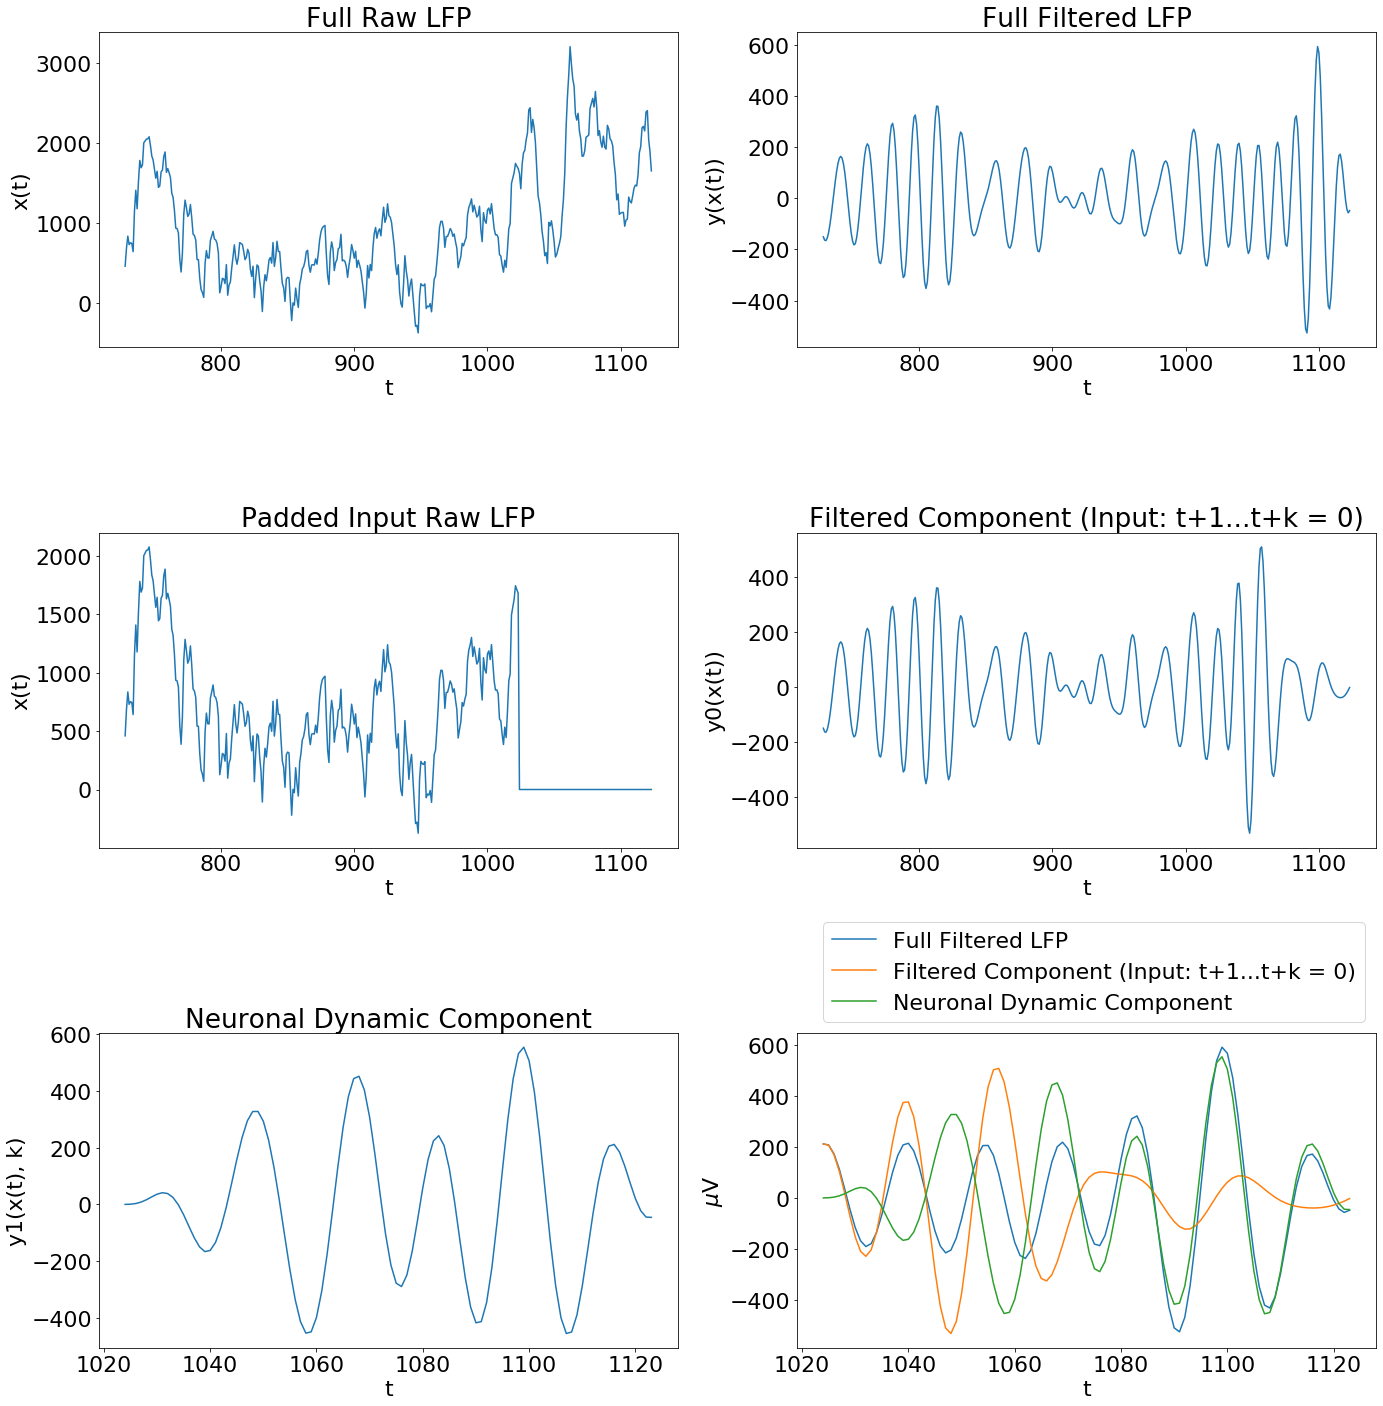

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 22

fig, axs = plt.subplots(3, 2)

t = np.arange(0, 1124, 1)

time_var = 728

axs[0,0].plot(t[time_var:], full_raw[time_var:,:])
axs[0,0].set_xlabel('t')
axs[0,0].set_ylabel('x(t)')
axs[0,0].set_title('Full Raw LFP')

axs[0,1].plot(t[time_var:], full_filters[time_var:,:])
axs[0,1].set_xlabel('t')
axs[0,1].set_ylabel('y(x(t))')
axs[0,1].set_title('Full Filtered LFP')

axs[1,0].plot(t[time_var:], x[time_var:,:])
axs[1,0].set_xlabel('t')
axs[1,0].set_ylabel('x(t)')
axs[1,0].set_title('Padded Input Raw LFP')

axs[1,1].plot(t[time_var:], y0[time_var:,:])
axs[1,1].set_xlabel('t')
axs[1,1].set_ylabel('y0(x(t))')
axs[1,1].set_title('Filtered Component (Input: t+1...t+k = 0)')

axs[2,0].plot(t[1024:], y1[1024:,:])
axs[2,0].set_xlabel('t')
axs[2,0].set_ylabel('y1(x(t), k)')
axs[2,0].set_title('Neuronal Dynamic Component')

axs[2,1].plot(t[1024:], full_filters[1024:,:], label="Full Filtered LFP")
axs[2,1].plot(t[1024:], y0[1024:,:], label="Filtered Component (Input: t+1...t+k = 0)")
axs[2,1].plot(t[1024:], y1[1024:,:], label='Neuronal Dynamic Component')
# axs[2,1].legend(loc='best')
axs[2,1].legend(bbox_to_anchor=(1, 1), loc='lower right', ncol=1)
axs[2,1].set_xlabel('t')
axs[2,1].set_ylabel(r'$\mu$V')


fig.tight_layout()
plt.show()